### <center> K-means </center>
                                                    

In [12]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets

data = arff.loadarff(open('3-spiral.arff','r'))[0]
databis = arff.loadarff(open('diamond9.arff','r'))[0]
datatier = arff.loadarff(open('dense-disk-5000.arff','r'))[0]


#print(data)
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
    
def calinski_metric_kmeans(data2):
    scores=[]
    start = time.time()
    print('on applique kmeans avec calinski')


    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        calinski=metrics.calinski_harabasz_score(data2, labels)
        scores.append(calinski)
        plt.scatter(j, calinski )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('calinski metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    
    
def sil_kmeans(data2):
    print('on applique kmeans avec sil')
    scores=[]
    start = time.time()

    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        sil=metrics.silhouette_score(data2, labels, metric='euclidean')
        scores.append(sil)
        plt.scatter(j, sil )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('silhouette metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    
def davies_kmeans(data2):
    
    print('on applique kmeans avec davies')

    scores=[]
    start = time.time()

    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        davies_b=davies_bouldin_score(data2, labels)
        scores.append(davies_b)
        plt.scatter(j, davies_b )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('davies metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def kmeans(nbcluster, data2):
    start = time.time()
    clustering = KMeans(n_clusters=nbcluster, init = 'k-means++').fit_predict(data2)
    plt.scatter(X, Y, c=clustering)
    end = time.time()
    print(f'execution time kmeans = {end - start}')
    plt.title('kmeans clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

execution time kmeans = 0.12767839431762695


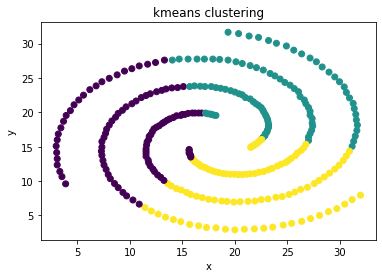

on applique kmeans avec calinski
The time used to execute this is given below
2.2295541763305664


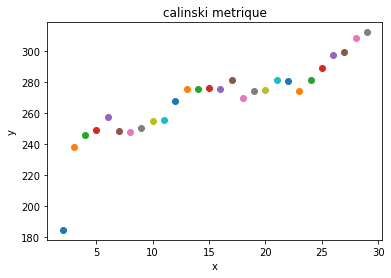

In [16]:
kmeans(3, data2)
#davies_kmeans(data2)
#sil_kmeans(data2)
#calinski_metric_kmeans(data2)

### <center> Agglomerative Clustering method </center>
                                                    

In [52]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold, datasets

data = arff.loadarff(open('3-spiral.arff','r'))[0]
#print(data)
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))


def calinski_metric_agglo(data2):
    scores=[]
    start = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec calinski '+i)

        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('Agglo')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            calinski=metrics.calinski_harabasz_score(data2, cl)
            scores.append(calinski)
            plt.scatter(j, calinski )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('calinski metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

def sil_agglo(data2):
    scores=[]
    start = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec sil '+i)


        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('Agglo')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            sil=metrics.silhouette_score(data2, cl, metric='euclidean')
            scores.append(sil)
            plt.scatter(j, sil )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('silhouette metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    

def davies_agglo(data2):
    scores=[]
    start = time.time()

    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec davies '+i)

        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('Agglo')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            davies_b=davies_bouldin_score(data2, cl)
            scores.append(davies_b)
            plt.scatter(j, davies_b )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('davies metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    
def agglo(data2, nbcluster):
    for j in ['single', 'average', 'complete', 'ward']:
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering = AgglomerativeClustering(n_clusters=nbcluster, linkage=j, affinity='euclidean').fit_predict(data2)
        plt.scatter(X, Y, c=clustering)

        plt.title('agglomerative method '+ j)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        end = time.time()

        print(f'execution time agglomerative : {end - start}')
        


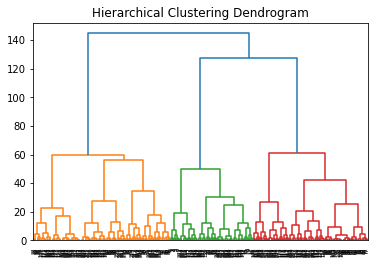

In [53]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data2)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level")
plt.show()

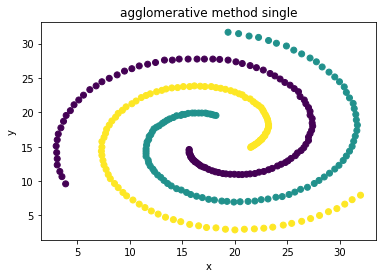

execution time agglomerative : 0.1269059181213379


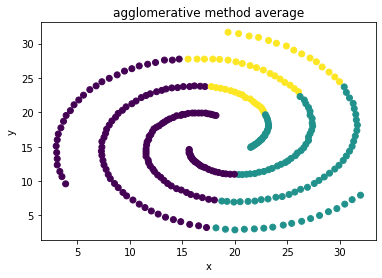

execution time agglomerative : 0.12405514717102051


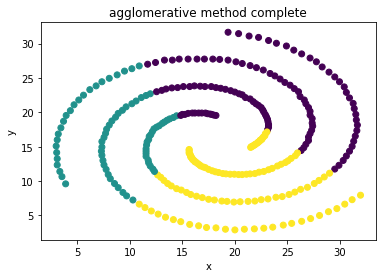

execution time agglomerative : 0.12398052215576172


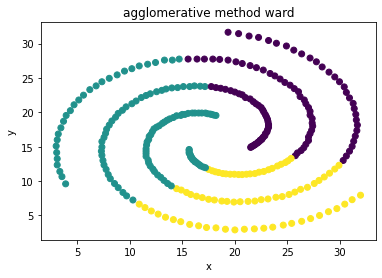

execution time agglomerative : 0.13216710090637207


In [54]:
agglo(data2,3)
#calinski_metric_agglo(data2)
#sil_agglo(data2)
#davies_agglo(data2)

### <center> DBSCAN </center>
                                                    

In [84]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import DBSCAN
import sys

data = arff.loadarff(open('banana.arff','r'))[0]
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))
    
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

def davies_dbscan(data2):
    scores=[]    
    maxi=sys.maxsize

    for my_min_samp in range(2, 5):
        for my_eps in np.arange(0.5, 2.0, 0.5):
            print(f'on applique dbscan avec davies, min_samp : {my_min_samp} et eps : {my_eps}')
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit_predict(data2)
            davies_b=davies_bouldin_score(data2, clustering)
            end = time.time()
            print(end - start)
            if davies_b > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=davies_b

            fig2 = plt.figure()
            ax2 = fig2.gca(projection='3d')
            y = my_eps
            x = my_min_samp
            z = davies_b
            ax2.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
            plt.show()
    print(best_tuple)
    
def sil_dbscan(data2):
    scores=[]    
    maxi=sys.maxsize
    
    for my_min_samp in range(2, 5):
        for my_eps in np.arange(0.5, 2.0, 0.5):
            print(f'on applique dbscan avec silhouette, min_samples : {my_min_samp}, eps : {my_eps}')
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit_predict(data2)
            sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
            end = time.time()
            print(end - start)
            if sil > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=sil
                
            fig2 = plt.figure()
            ax2 = fig2.gca(projection='3d')
            y = my_eps
            x = my_min_samp
            z = sil
            ax2.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
            plt.show()
                
    print(best_tuple)
    
def calinski_metric_dbscan(data2):
    scores=[]    
    maxi=sys.maxsize
    
    for my_min_samp in range(2, 5):
        for my_eps in np.arange(0.5, 2.0, 0.5):
            print(f'on applique dbscan avec calinski, min_samp : {my_min_samp} eps : {my_eps}')
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit(data2)
            calinski=metrics.calinski_harabasz_score(data2, clustering.labels_)
            end = time.time()
            print(end - start)
            if calinski > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=calinski
                
            fig2 = plt.figure()
            ax2 = fig2.gca(projection='3d')
            y = my_eps
            x = my_min_samp
            z = calinski
            ax2.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
            plt.show()
                
    print(best_tuple)
    
def method_DBSCAN (data2, my_min_samp, my_eps):
    start=time.time()
    clustering = DBSCAN(min_samples=my_min_samp, eps=my_eps).fit_predict(data2)
    end = time.time()
    
    plt.scatter(X, Y, c=clustering)

    plt.title('dbscan clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    print(f'execution time dbscan : {end - start}')


        

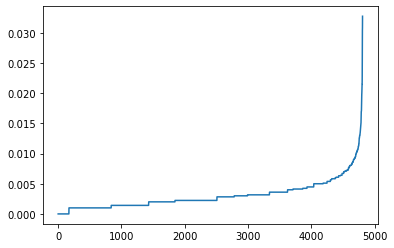

In [85]:
#Methode du coude
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data2)
distances, indices = nbrs.kneighbors(data2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

on applique dbscan, eps : 0.005 et min_samples :5


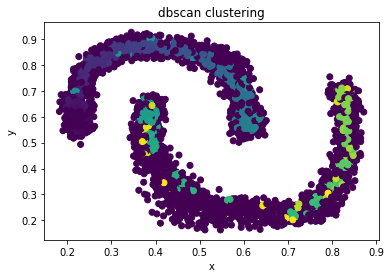

execution time dbscan : 0.026520729064941406
on applique dbscan, eps : 0.007 et min_samples :5


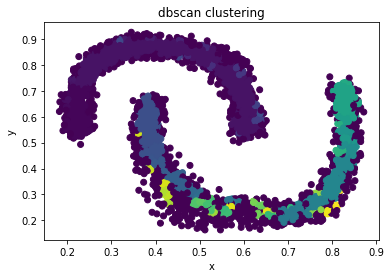

execution time dbscan : 0.022007465362548828
on applique dbscan, eps : 0.009000000000000001 et min_samples :5


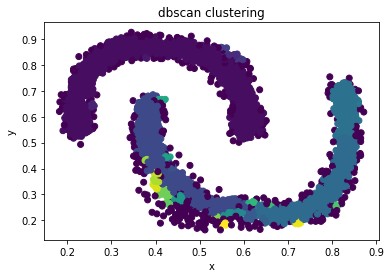

execution time dbscan : 0.023476839065551758
on applique dbscan, eps : 0.011 et min_samples :5


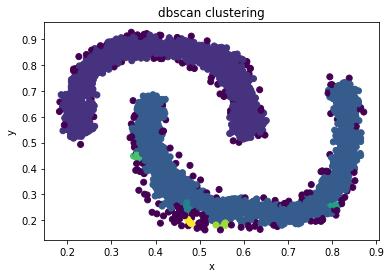

execution time dbscan : 0.025030136108398438
on applique dbscan, eps : 0.013000000000000001 et min_samples :5


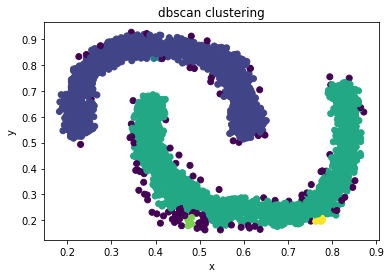

execution time dbscan : 0.0269625186920166
on applique dbscan, eps : 0.015 et min_samples :5


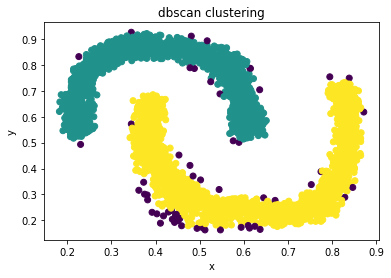

execution time dbscan : 0.027784109115600586
on applique dbscan, eps : 0.017 et min_samples :5


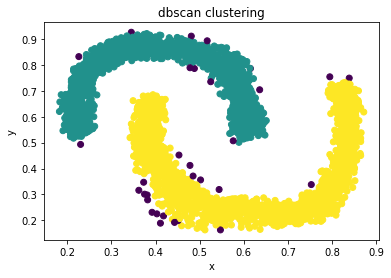

execution time dbscan : 0.02918863296508789
on applique dbscan, eps : 0.019 et min_samples :5


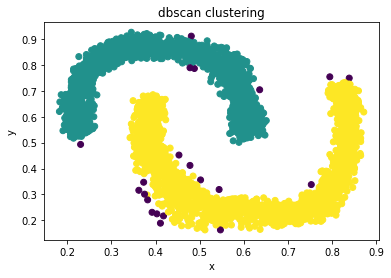

execution time dbscan : 0.030419588088989258
on applique dbscan, eps : 0.021 et min_samples :5


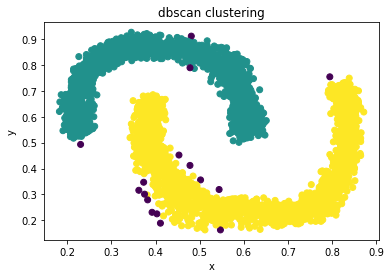

execution time dbscan : 0.031600236892700195
on applique dbscan, eps : 0.023000000000000003 et min_samples :5


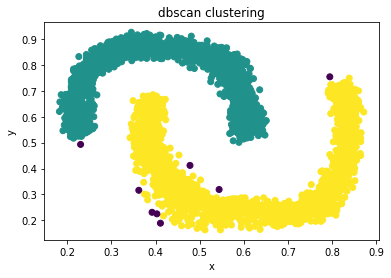

execution time dbscan : 0.03295302391052246
on applique dbscan, eps : 0.025 et min_samples :5


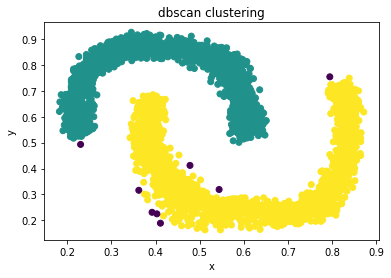

execution time dbscan : 0.03461408615112305
on applique dbscan, eps : 0.027 et min_samples :5


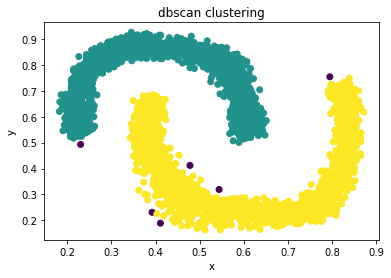

execution time dbscan : 0.03571581840515137
on applique dbscan, eps : 0.029 et min_samples :5


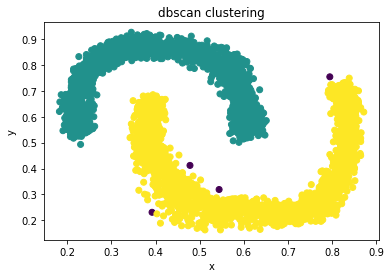

execution time dbscan : 0.037680864334106445
on applique dbscan, eps : 0.031000000000000003 et min_samples :5


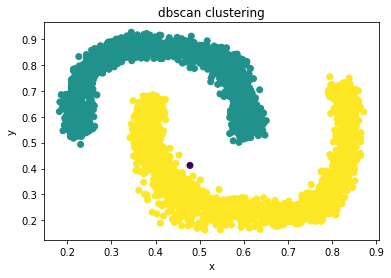

execution time dbscan : 0.03865361213684082
on applique dbscan, eps : 0.033 et min_samples :5


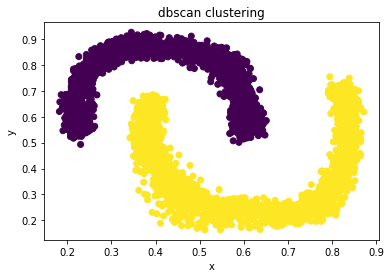

execution time dbscan : 0.04107260704040527
on applique dbscan, eps : 0.034999999999999996 et min_samples :5


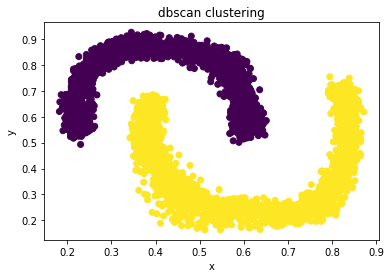

execution time dbscan : 0.04194283485412598
on applique dbscan, eps : 0.037 et min_samples :5


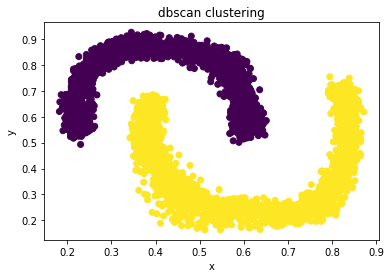

execution time dbscan : 0.04318809509277344
on applique dbscan, eps : 0.039 et min_samples :5


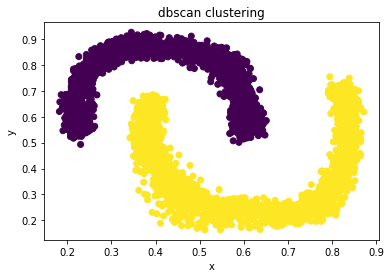

execution time dbscan : 0.04424238204956055
on applique dbscan, eps : 0.041 et min_samples :5


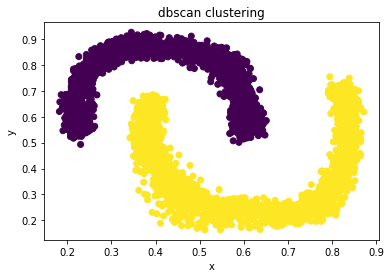

execution time dbscan : 0.04555344581604004
on applique dbscan, eps : 0.043 et min_samples :5


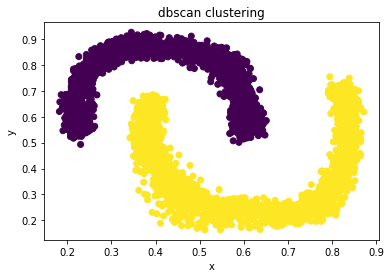

execution time dbscan : 0.04600882530212402


In [86]:
for i in np.arange(0.005, 0.045, 0.002):
    print(f'on applique dbscan, eps : {i} et min_samples :5')
    method_DBSCAN(data2, 5, i)

### <center> HDBSCAN </center>
                                                    

In [93]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.datasets import make_blobs
import sys

data = arff.loadarff(open('diamond9.arff','r'))[0]
#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))


def davies_hdbscan(data2):
    scores=[] 
    maxi=sys.maxsize

    for my_min_samp in range(2, 5):
        print('on applique dbscan avec davies, my_min_samp :'+my_min_samp)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        davies_b=davies_bouldin_score(data2, labels)
        end = time.time()
        print(end - start)
        if davies_b > maxi :
            best= my_min_samp
            maxi=davies_b
                
        plt.scatter(my_min_samp, davies_b)
        plt.title('hdbscan')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    print(best) 
    
def sil_hdbscan(data2):
    scores=[] 
    maxi=sys.maxsize

    for my_min_samp in range(2, 5):
        print('on applique dbscan avec silhouette, my_min_samp :'+my_min_samp)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        sil=metrics.silhouette_score(data2, cluster_labels, metric='euclidean')
        end = time.time()
        print(end - start)
        if sil > maxi :
            best= my_min_samp
            maxi=sil
        
        plt.scatter(my_min_samp, sil)
        plt.title('hdbscan')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    print(best) 
    
    
def calinski_metric_hdbscan(data2):
    scores=[] 
    maxi=sys.maxsize

    for my_min_samp in range(2, 5):
        print('on applique dbscan avec calinski, my_min_samp :'+my_min_samp)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        calinski=metrics.calinski_harabasz_score(data2, cluster_labels)
        end = time.time()
        print(end - start)
        if calinski > maxi :
            best= my_min_samp
            maxi=calinski
            
        plt.scatter(my_min_samp, calinski)
        plt.title('hdbscan')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    print(best) 
    
    
def HDBSCAN (data2, my_min_samp):
    start=time.time()
    clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
    cluster_labels = clustering2.fit_predict(data2)
    end = time.time()
    
    plt.scatter(X, Y, c=cluster_labels)

    plt.title('hdbscan clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    print(f'execution time hdbscan : {end - start}')



        





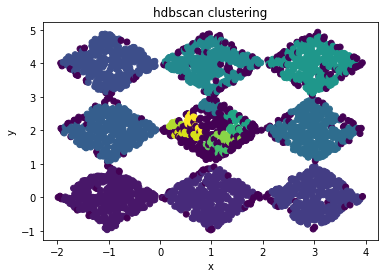

execution time hdbscan : 0.06842517852783203


In [94]:
HDBSCAN(data2, 9)

### <center> Synthèse </center>
                                                    

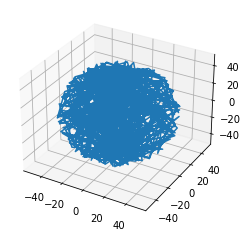

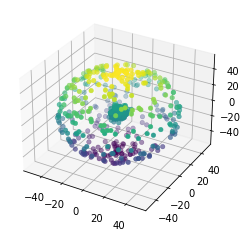

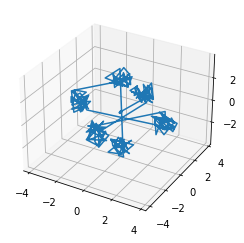

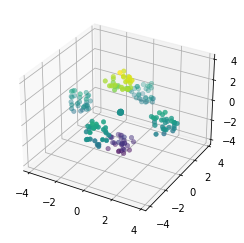

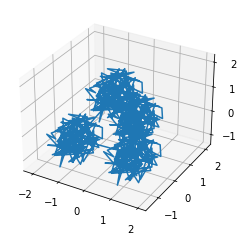

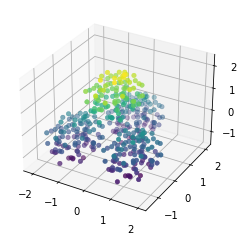

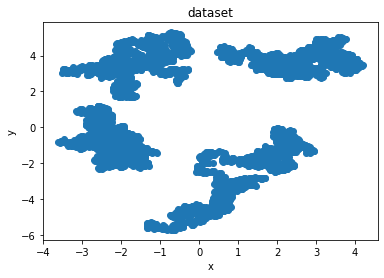

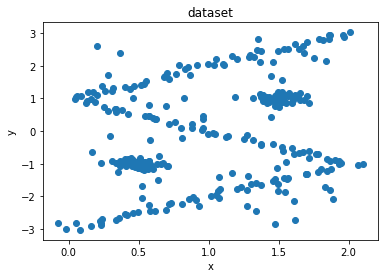

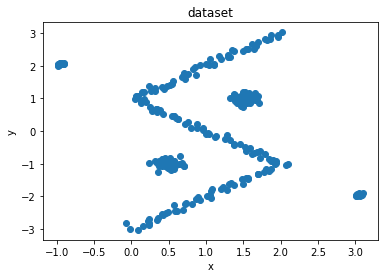

on applique kmeans avec davies
The time used to execute this is given below
3.1012444496154785


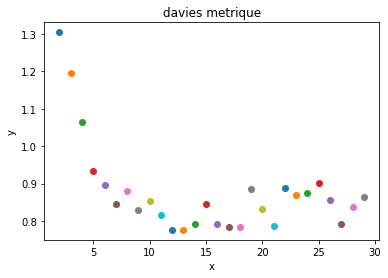

on applique kmeans avec sil
The time used to execute this is given below
9.10498595237732


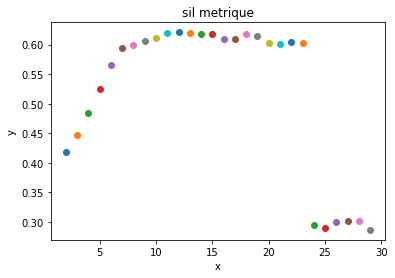

on applique kmeans avec calinski
The time used to execute this is given below
3.008758783340454


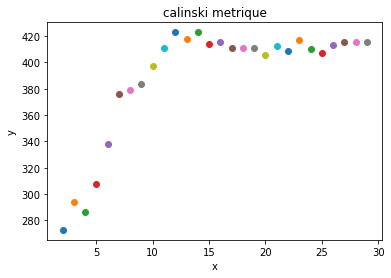

on applique agglo avec davies single
The time used to execute this is given below
0.33902740478515625


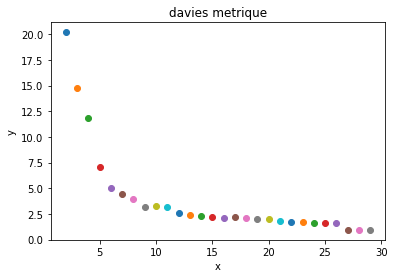

on applique agglo avec davies average
The time used to execute this is given below
1.0990381240844727


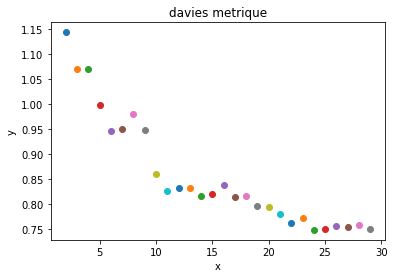

on applique agglo avec davies complete
The time used to execute this is given below
1.860785961151123


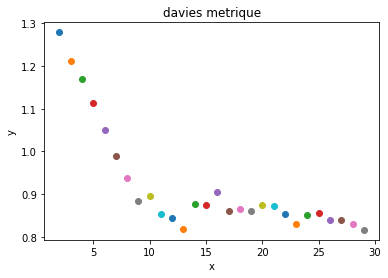

on applique agglo avec davies ward
The time used to execute this is given below
2.837536573410034


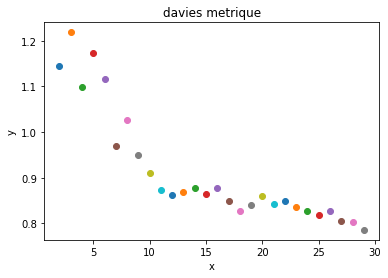

on applique agglo avec sil single
The time used to execute this is given below
4.674263954162598


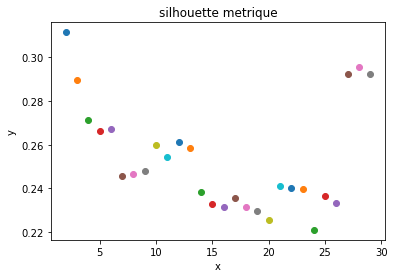

on applique agglo avec sil average
The time used to execute this is given below
9.285440683364868


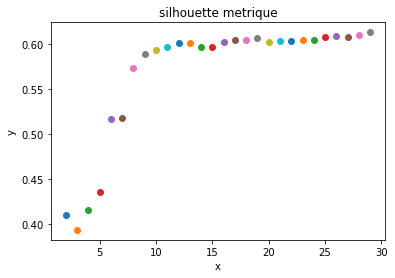

on applique agglo avec sil complete
The time used to execute this is given below
14.97057557106018


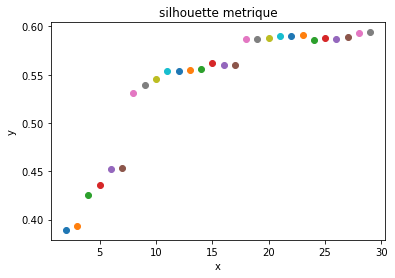

on applique agglo avec sil ward
The time used to execute this is given below
20.7873752117157


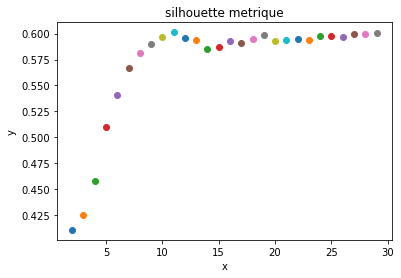

on applique agglo avec calinski single
The time used to execute this is given below
0.23493552207946777


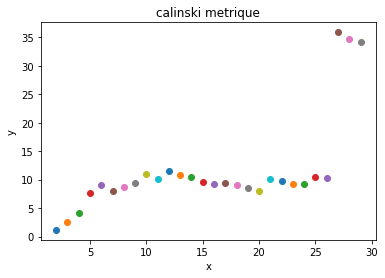

on applique agglo avec calinski average
The time used to execute this is given below
0.8743059635162354


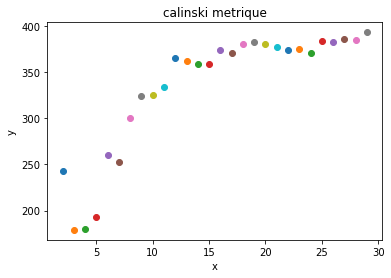

on applique agglo avec calinski complete
The time used to execute this is given below
1.5039393901824951


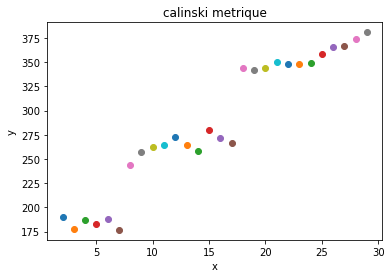

on applique agglo avec calinski ward
The time used to execute this is given below
2.186854362487793


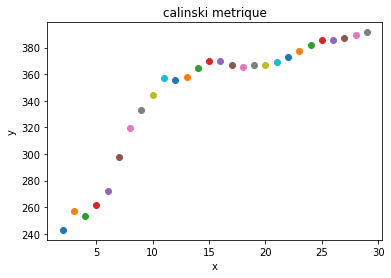

on applique dbscan avec davies, min_samp : 2 et eps : 0.5
0.01059103012084961


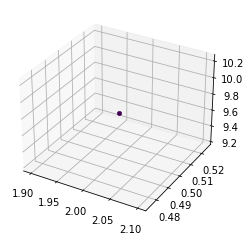

on applique dbscan avec davies, min_samp : 2 et eps : 1.0
0.016823768615722656


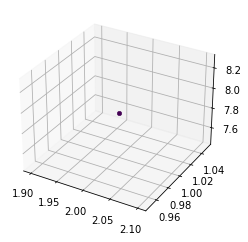

on applique dbscan avec davies, min_samp : 2 et eps : 1.5
0.013697624206542969


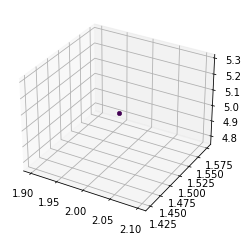

on applique dbscan avec davies, min_samp : 3 et eps : 0.5
0.014068126678466797


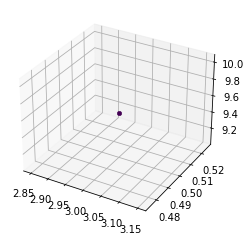

on applique dbscan avec davies, min_samp : 3 et eps : 1.0
0.01094961166381836


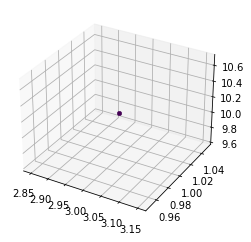

on applique dbscan avec davies, min_samp : 3 et eps : 1.5
0.007674217224121094


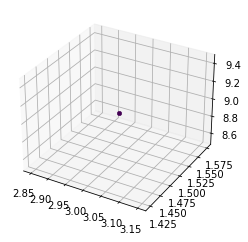

on applique dbscan avec davies, min_samp : 4 et eps : 0.5


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [98]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = np.genfromtxt('dataset/a.txt')
data2 = np.genfromtxt('dataset/h.txt')
data3 = np.genfromtxt('dataset/t.txt')
data4 = np.genfromtxt('dataset/tr.txt')
data5 = np.genfromtxt('dataset/zgn.txt')
data6 = np.genfromtxt('dataset/zgo.txt')

for j in [data, data2, data3] : 
    fig1 = plt.figure()
    fig2 = plt.figure()
    ax1 = fig1.gca(projection='3d')
    ax2 = fig2.gca(projection='3d')
    y = j[:,0]
    x = j[:,1]
    z = j[:,2]
    ax1.plot(x, y, z)
    ax2.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
    plt.show()
    
for j in [data4, data5, data6] : 
    y = j[:,0]
    x = j[:,1]
    plt.scatter(x, y)
    plt.title('dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    """
    données 3D
    
    data : sphere avec noyau, nb cluster attendus : 2
    data2 : 6 paquets distincts et plus particulièrement 2 groupes de trois paquets 
            ainsi qu'un point central, nb cluster attendus : 6 (+1?)
    data3 : 4 paquets moyens plus rapprochés, nb cluster attendus : 4
    
    données 2D
    
    data4 : 4 paquets assez étalés, nb cluster attendus : 4 (+1 si on considère qu'un paquet très étalé est en fait composé de deux paquets)
    data5 : un Z, deux paquets, et des points "aléatoires", nb cluster attendus : 3 et une autre couleur pour les points "aléatoires"
    data6 : un Z et quatre paquets distincts, nb cluster attendus : 5
    """

for j in [data, data2, data3, data4, data5, data6] : 
    
    davies_kmeans(j)
    sil_kmeans(j)
    calinski_metric_kmeans(j)
    #kmeans(nbcluster=, data_ready)
    
    davies_agglo(j)
    sil_agglo(j)
    calinski_metric_agglo(j)
    #agglo(data2, nbcluster=)
    
    davies_dbscan(j)
    sil_dbscan(j)
    calinski_metric_dbscan(j)
    
    davies_hdbscan(j)
    sil_hdbscan(j)
    calinski_metric_hdbscan(j)
    